<a href="https://colab.research.google.com/github/hradawski/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/Hern%C3%A1n_Radawski_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hernán Radawski <br>

Link: https://colab.research.google.com/drive/1YJ6PvKcAqubK6UZDnI9mhLOSSpfvxAMB


<br>
Actividad Guiada 2


In [0]:
# Decorador que mide en ms el tiempo que tarda un método
import time

def timer_decorator(method):
    def measure_time(*args, **kw):
        time_begin = time.time()
        result = method(*args, **kw)
        time_end = time.time()
        ms_elapsed = (time_end - time_begin) * 1000

        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = ms_elapsed
        else:
            print(method.__name__, "lasted", ms_elapsed, "ms")

        return result
    return measure_time


# se declara el decorador sobre el método que se quiera medir
@timer_decorator 
def method_to_measure(**kwargs):
  time.sleep(1.16) # Prueba para que se pare un tiempo


# se llama al método con el diccionario donde se guardará la info
# si no se manda el diccionario se mostrará por pantalla
time_info ={}
method_to_measure(log_time=time_info)

print(time_info)

{'METHOD_TO_MEASURE': 1160.1369380950928}


In [0]:
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

def Precios(TARIFAS):
################################################################  
#Total de Nodos
    N = len(TARIFAS[0])

    #Inicialización de la tabla de precios
    PRECIOS = [ [9999]*N for i in [9999]*N] # n x n
  
    RUTA = [ [""]*N for i in [""]*N]

    for i in range(N-1):
        for j in range(i+1, N):
            MIN = TARIFAS[i][j]
            RUTA[i][j] = i

            for k in range(i, j):
                if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
                    MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
                    RUTA[i][j] = k
                PRECIOS[i][j] = MIN
                
    return PRECIOS,RUTA

 

In [0]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [0]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,0,2,5'

Problema de asignación de agentes 

In [0]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [0]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]] 
  return VALOR
  
valor((0, 1, 2, 3),COSTES)

73

In [0]:
import itertools
@timer_decorator 


def fuerza_bruta(COSTES):
    mejor_valor = 10e10 
    mejor_solucion = ()
    for s in list(itertools.permutations(range(len(COSTES)))):
        #print(s,valor(s,COSTES))
        valor_tmp = valor(s,COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp 
            mejor_solucion= s
            
    print("La mejor solucion es : ", mejor_solucion, " con valor: ", mejor_valor)

fuerza_bruta(COSTES)

La mejor solucion es :  (0, 2, 3, 1)  con valor:  61
fuerza_bruta lasted 8.975982666015625 ms


In [0]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1
 
def CI(S,COSTES):
    VALOR = 0
    #Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]
        #Estimacion
    for i in range( len(COSTES)):    
        if i not in S:
            VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
    return VALOR

 

In [0]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
    HIJOS = []
    for i in range(N):
        if i not in NODO:
            HIJOS.append({'s':NODO +(i,)})
    return HIJOS

In [0]:
# Cota superior
def CS(S,COSTES):
    VALOR = 0
    #Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]
     #Estimacion
    for i in range(  len(COSTES) ):
        if i not in S:
            VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
    return VALOR

In [0]:
@timer_decorator 
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
    #print(COSTES)
    DIMENSION = len(COSTES)  
    MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
    CotaSup = valor(MEJOR_SOLUCION,COSTES)
    #print("Cota Superior:", CotaSup)

    NODOS=[]
    NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

    iteracion = 0

    while( len(NODOS) > 0):
        iteracion +=1

        nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
        #print("Nodo prometedor:", nodo_prometedor)

        #Ramificacion
        #Se generan los hijos
        HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

        #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
        if len(NODO_FINAL ) >0: 
          #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
          if NODO_FINAL[0]['ci'] < CotaSup:
            CotaSup = NODO_FINAL[0]['ci']
            MEJOR_SOLUCION = NODO_FINAL

        #Poda
        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

        #Añadimos los hijos 
        NODOS.extend(HIJOS) 

        #Eliminamos el nodo ramificado
        NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

    print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para dimension:  4
ramificacion_y_poda lasted 3.009796142578125 ms


Averiguar a pertir de que dimensiones la opcion de Poda es mejor que fuerza bruta 

In [0]:
import numpy as np

_COSTES = np.random.randint(50, size=(5, 5))
ramificacion_y_poda(_COSTES)
fuerza_bruta(_COSTES)
print(_COSTES)
print ("---------------------------------A PARTIR DE 7X7 YA ESTA CLARO QUE FUERZA BRUTA ES MAS LENTO--------------- ")
_COSTES = np.random.randint(50, size=(7, 7))
ramificacion_y_poda(_COSTES)
fuerza_bruta(_COSTES)

La solucion final es: [{'s': (1, 2, 0, 4, 3), 'ci': 47}]  en  24  iteraciones  para dimension:  5
ramificacion_y_poda lasted 0.995635986328125 ms
La mejor solucion es :  (1, 2, 0, 4, 3)  con valor:  47
fuerza_bruta lasted 1.9969940185546875 ms
[[31  5 26 39  0]
 [34 48  2 33  5]
 [ 0 38 31 28  1]
 [25 36 36 34 16]
 [34 16 17 24 35]]
---------------------------------A PARTIR DE 7X7 YA ESTA CLARO QUE FUERZA BRUTA ES MAS LENTO--------------- 
La solucion final es: [{'s': (2, 4, 1, 5, 0, 6, 3), 'ci': 30}]  en  28  iteraciones  para dimension:  7
ramificacion_y_poda lasted 3.987550735473633 ms
La mejor solucion es :  (2, 4, 1, 5, 0, 6, 3)  con valor:  30
fuerza_bruta lasted 41.88656806945801 ms


In [0]:
print ("---------------------------------A PARTIR DE 17x17 PODA ES MUUUUUUY LENTO--------------- ")
_COSTES = np.random.randint(50, size=(16,16))
ramificacion_y_poda(_COSTES)


---------------------------------A PARTIR DE 17x17 PODA ES MUUUUUUY LENTO--------------- 
La solucion final es: [{'s': (3, 11, 7, 14, 12, 4, 2, 6, 9, 15, 8, 5, 1, 13, 0, 10), 'ci': 50}]  en  1247  iteraciones  para dimension:  16
ramificacion_y_poda lasted 1279.576301574707 ms


Descenso de Gradiente 

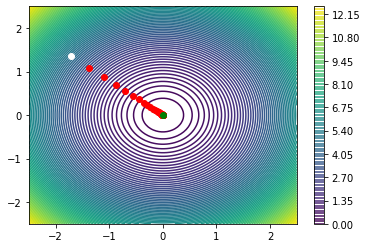

Solucion: [-6.044669954456149e-49, 4.795209278293607e-49] 5.9532066880938e-97


In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

import random
f= lambda X: X[0]**2+X[1]**2      #funcion
df = lambda X: [2*X[0] , 2*X[1]]  #gradiente

# Preparar los datos para dibujar un mapa de niveles de Z
resolucion = 100
rango = 2.5
X=np.linspace(-rango,rango,resolucion )
Y=np.linspace(-rango,rango,resolucion )
Z=np.zeros((resolucion,resolucion))

for ix,x in enumerate(X): 
    for iy,y in enumerate(Y):
        Z[iy,ix] = f([x,y])
        
#Pinta el mapa de niveles de Z
plt.contour(X,Y,Z,resolucion)
plt.colorbar()

# Generamos el punto aleatorio
P=[random.uniform(-2,2), random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")

# Tasa de aprendizaje
TA=.1

#Iteraciones
for _ in range(500): 
    grad=df(P)
    #print(P.grad)
    P[0],P[1]=P[0] - TA*grad[0] , P[1]- TA*grad[1]
    plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o", c="green")
plt.show()
    
print("Solucion:",P,f(P))
                

Con otra Funcion a minimizar
sin/1/2*x^2-1/4*y^2+3) *cos(2*x+1-E^y)

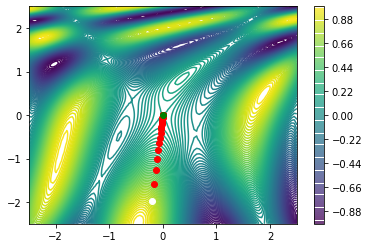

Solucion: [-7.033361923146954e-50, -6.90267044169647e-49] 0.1411200080598672


In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

import random
f= lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 +3) * np.cos(2 * X[0] + 1 - np.e**X[1])       #funcion
df = lambda X: [2*X[0] , 2*X[1]]  #gradiente

# Preparar los datos para dibujar un mapa de niveles de Z
resolucion = 100
rango = 2.5
X=np.linspace(-rango,rango,resolucion )
Y=np.linspace(-rango,rango,resolucion )
Z=np.zeros((resolucion,resolucion))

for ix,x in enumerate(X): 
    for iy,y in enumerate(Y):
        Z[iy,ix] = f([x,y])
        
#Pinta el mapa de niveles de Z
plt.contour(X,Y,Z,resolucion)
plt.colorbar()

# Generamos el punto aleatorio
P=[random.uniform(-2,2), random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")

# Tasa de aprendizaje
TA=.1

#Iteraciones
for _ in range(500): 
    grad=df(P)
    #print(P.grad)
    P[0],P[1]=P[0] - TA*grad[0] , P[1]- TA*grad[1]
    plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o", c="green")
plt.show()
    
print("Solucion:",P,f(P))
                